In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import nltk
import utils

In [2]:
%matplotlib inline

In [3]:
stemmed_keywords = utils.get_stemmed_keywords()

In [25]:
df = pd.read_json(utils.suas_with_topic_frequencies)
df['year_of_presidency'] = df['year'] - df['year_first_inaugurated']

In [27]:
# drop jimmy carter written sua
df = df[df['year'] != 1981]

In [28]:
for topic in stemmed_keywords.keys():
    df[topic] = (df[topic] - df[topic].mean()) / df[topic].std()

In [41]:
mean_df = df.groupby(by=['president']).agg({topic: 'mean' for topic in stemmed_keywords.keys()}).reset_index()

In [48]:
mean_df

,president,government,environment,economy,international,education,infrastructure,defense,social,energy,healthcare
0,Barack Obama,0.636226,0.000000,0.884075,0.368556,1.017872,1.355046,0.571143,0.393595,1.260400,0.504018
1,George H.W. Bush,-0.365566,-0.089671,-0.698528,-0.446378,-0.148792,-0.186642,-0.473631,-0.444055,-0.687716,-0.562625
2,George W. Bush,-0.154663,-0.149452,-0.687334,-0.289754,-0.148792,-0.615414,0.282586,0.040369,0.153376,0.437597
3,Gerald R. Ford,-0.112482,-0.269014,0.107466,0.493366,-1.433814,-0.489305,0.003980,-0.726636,0.277065,-0.656396
4,Jimmy Carter,-1.377904,-0.538028,-0.463447,-0.152708,-1.366181,-0.791967,0.063681,-0.847742,-0.316646,-1.219021
5,Richard Nixon,-0.837991,-0.053803,-0.725395,-1.362629,-1.000964,-0.625503,-1.631837,-1.259503,-0.910358,-0.712658
6,Ronald Reagan,0.044189,-0.730180,0.040300,0.132571,0.025121,-0.165023,-0.388343,-0.224911,-0.878552,-0.616208
7,William J. Clinton,0.821520,1.345069,0.803115,0.837379,0.981641,0.483540,0.711868,1.487874,0.202851,1.031479


In [38]:
presidents_ordered = ['Richard Nixon', 'Gerald R. Ford', 'Jimmy Carter', 'Ronald Reagan', 'George H.W. Bush',
                      'William J. Clinton', 'George W. Bush', 'Barack Obama']

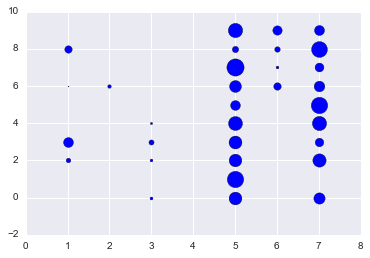

In [60]:
fig, ax = plt.subplots()
for i, president in enumerate(presidents_ordered):
    for j, topic in enumerate(stemmed_keywords.keys()):
        ax.scatter(i, j, s=mean_df[mean_df['president'] == president][topic]*200)